In [1]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt

# load image
img = cv.imread("data/people.jpg")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# load cascade model classifier
alt2Path = cv.data.haarcascades +"haarcascade_frontalface_alt2.xml"
defaultPath = cv.data.haarcascades +'haarcascade_frontalface_default.xml'
# alt2Path = "../../samples/data/haarcascade_frontalface_alt2.xml"
# defaultPath = '../../samples/data/haarcascade_frontalface_default.xml'
casAlt2 = cv.CascadeClassifier(alt2Path)
casDefault = cv.CascadeClassifier(defaultPath)

# detect faces as list of rectangles
facesAlt2 = casAlt2.detectMultiScale(imgGray)
facesDefault = casDefault.detectMultiScale(imgGray)
# using getFacesHAAR
retval, facesModelAlt2 = cv.face.getFacesHAAR(img, alt2Path)
facesModelAlt2 = np.squeeze(facesModelAlt2)
retval, facesModelDefault = cv.face.getFacesHAAR(img, defaultPath)
facesModelDefault = np.squeeze(facesModelDefault)

# show
fig = plt.figure(figsize=(20,10))
# BGR to RGB
plt.subplot(2,3,1)
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)

# 
color = (0, 0, 255)
thickness = 4
# 
imgFace = img.copy()
for x,y,w,h in facesAlt2:
    pt1 = (x,y)
    pt2 = (x+w,y+h)
    cv.rectangle(imgFace, pt1, pt2, color, thickness)
# BGR to RGB
plt.subplot(2,3,2)
imgRGB = imgFace[:,:,::-1]
plt.imshow(imgRGB)

# 
imgFace = img.copy()
for x,y,w,h in facesDefault:
    pt1 = (x,y)
    pt2 = (x+w,y+h)
    cv.rectangle(imgFace, pt1, pt2, color, thickness)
# BGR to RGB
plt.subplot(2,3,3)
imgRGB = imgFace[:,:,::-1]
plt.imshow(imgRGB)

# 
color = (0, 255, 255)
# 
imgFace = img.copy()
for x,y,w,h in facesModelAlt2:
    pt1 = (x,y)
    pt2 = (x+w,y+h)
    cv.rectangle(imgFace, pt1, pt2, color, thickness)
# BGR to RGB
plt.subplot(2,3,5)
imgRGB = imgFace[:,:,::-1]
plt.imshow(imgRGB)

# 
imgFace = img.copy()
for x,y,w,h in facesModelDefault:
    pt1 = (x,y)
    pt2 = (x+w,y+h)
    cv.rectangle(imgFace, pt1, pt2, color, thickness)
# BGR to RGB
plt.subplot(2,3,6)
imgRGB = imgFace[:,:,::-1]
plt.imshow(imgRGB)


plt.show()

<Figure size 2000x1000 with 5 Axes>

CascadeClassifier
detectMultiScale
getFacesHAAR
show


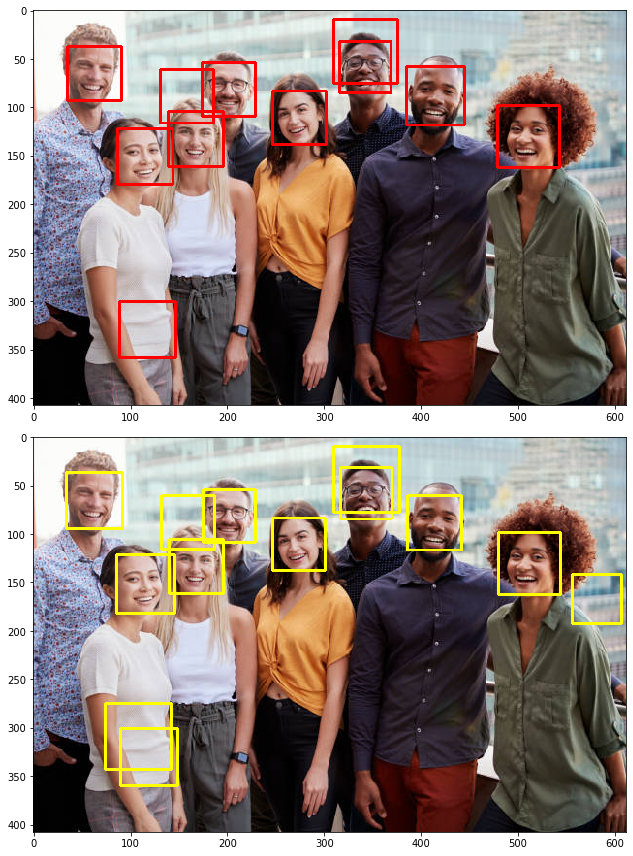

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# load image
img = cv.imread("data/people.jpg")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# load cascade model classifier
alt2Path = cv.data.haarcascades +"haarcascade_frontalface_alt2.xml"
defaultPath = cv.data.haarcascades +'haarcascade_frontalface_default.xml'

# detectMultiScale
print('CascadeClassifier')
# casAlt2 = cv.CascadeClassifier(alt2Path)
casDefault = cv.CascadeClassifier(defaultPath)
# detect faces as list of rectangles
print('detectMultiScale')
# facesAlt2 = casAlt2.detectMultiScale(imgGray)
facesDefault = casDefault.detectMultiScale(imgGray)

# using getFacesHAAR
print('getFacesHAAR')
# retval, facesModelAlt2 = cv.face.getFacesHAAR(img, alt2Path)
# facesModelAlt2 = np.squeeze(facesModelAlt2)
retval, facesModelDefault = cv.face.getFacesHAAR(img, defaultPath)
facesModelDefault = np.squeeze(facesModelDefault)

print('show')
# show
fig = plt.figure(figsize=(16,12))
# BGR to RGB
# plt.subplot(2,3,1)
# imgRGB = img[:,:,::-1]
# plt.imshow(imgRGB)

#
color = (0, 0, 255)
thickness = 2
#
# imgFace = img.copy()
# for x,y,w,h in facesAlt2:
#     pt1 = (x,y)
#     pt2 = (x+w,y+h)
#     cv.rectangle(imgFace, pt1, pt2, color, thickness)
# # BGR to RGB
# plt.subplot(2,3,2)
# imgRGB = imgFace[:,:,::-1]
# plt.imshow(imgRGB)

#
imgFace = img.copy()
for x, y, w, h in facesDefault:
    pt1 = (x, y)
    pt2 = (x+w, y+h)
    cv.rectangle(imgFace, pt1, pt2, color, thickness)

# BGR to RGB

plt.subplot(2, 1, 1)
imgRGB = imgFace[:, :, ::-1]
plt.imshow(imgRGB)

#
color = (0, 255, 255)
#
# imgFace = img.copy()
# for x,y,w,h in facesModelAlt2:
#     pt1 = (x,y)
#     pt2 = (x+w,y+h)
#     cv.rectangle(imgFace, pt1, pt2, color, thickness)
# # BGR to RGB
# plt.subplot(2,3,5)
# imgRGB = imgFace[:,:,::-1]
# plt.imshow(imgRGB)

#
imgFace = img.copy()
for x, y, w, h in facesModelDefault:
    pt1 = (x, y)
    pt2 = (x+w, y+h)
    cv.rectangle(imgFace, pt1, pt2, color, thickness)
# BGR to RGB

plt.subplot(2, 1, 2)
imgRGB = imgFace[:, :, ::-1]
plt.imshow(imgRGB)

plt.tight_layout()
plt.show()


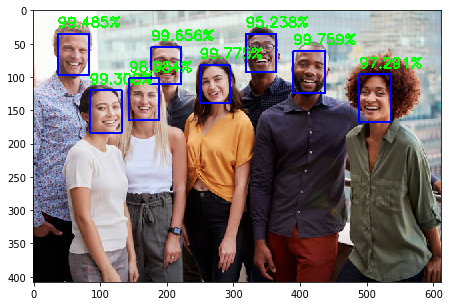

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread("data/people.jpg")

# image dimension
h, w = img.shape[:2]

# load model
model = cv.dnn.readNetFromCaffe("../../samples/data/deploy.prototxt",
                              "../../samples/data/res10_300x300_ssd_iter_140000_fp16.caffemodel")

# preprocessing
# image resize to 300x300 by substraction mean vlaues [104., 117., 123.]
blob = cv.dnn.blobFromImage(img, 1.0, (300, 300), [
                            104., 117., 123.], False, False)

# set blob asinput and detect face
model.setInput(blob)
detections = model.forward()

faceCounter = 0
# draw detections above limit confidence > 0.7
for i in range(0, detections.shape[2]):
    # confidence
    confidence = detections[0, 0, i, 2]
    #
    if confidence > 0.7:
        # face counter
        faceCounter += 1
        # get coordinates of the current detection
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (x1, y1, x2, y2) = box.astype("int")

        # Draw the detection and the confidence:
        cv.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        text = "{:.3f}%".format(confidence * 100)
        y = y1 - 10 if y1 - 10 > 10 else y1 + 10
        cv.putText(img, text, (x1, y), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# show
fig = plt.figure(figsize=(10, 5))

# Plot the images:
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)

plt.show()

## TensorFlow

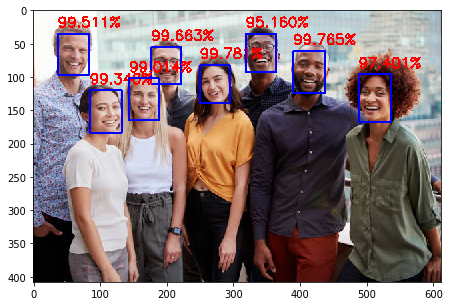

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread("data/people.jpg")

# image dimension
h, w = img.shape[:2]

# load model
model = cv.dnn.readNetFromTensorflow("../../samples/data/opencv_face_detector_uint8.pb", "../../samples/data/opencv_face_detector.pbtxt")

# preprocessing
# image resize to 300x300 by substraction mean vlaues [104., 117., 123.]
blob = cv.dnn.blobFromImage(img, 1.0, (300, 300), [
                            104., 117., 123.], False, False)

# set blob asinput and detect face
model.setInput(blob)
detections = model.forward()

faceCounter = 0
# draw detections above limit confidence > 0.7
for i in range(0, detections.shape[2]):
    # confidence
    confidence = detections[0, 0, i, 2]
    #
    if confidence > 0.7:
        # face counter
        faceCounter += 1
        # get coordinates of the current detection
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (x1, y1, x2, y2) = box.astype("int")

        # Draw the detection and the confidence:
        cv.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        text = "{:.3f}%".format(confidence * 100)
        y = y1 - 10 if y1 - 10 > 10 else y1 + 10
        cv.putText(img, text, (x1, y), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# show
fig = plt.figure(figsize=(10, 5))

# Plot the images:
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)

plt.show()

## Facial Landmark

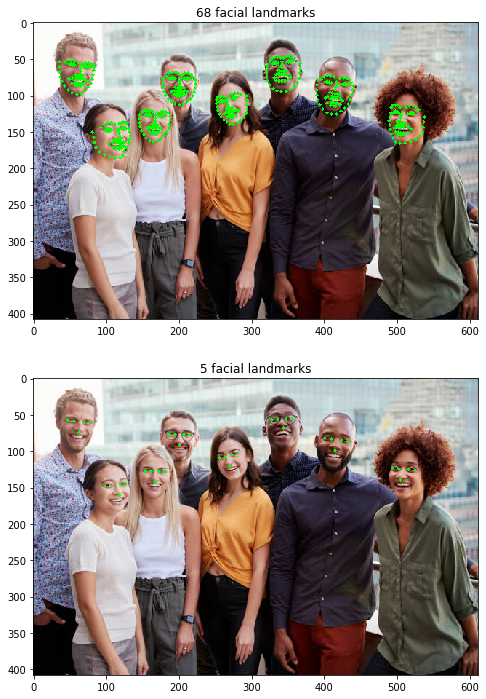

In [5]:
import cv2
import matplotlib.pyplot as plt
import face_recognition

# Load image:
img = cv2.imread("data/people.jpg")

# Create imgs to show the results:
img68 = img.copy()
img5 = img.copy()

# BRG to RGB
rgb = img[:, :, ::-1]

# Detect 68 landmarks:
face_landmarks_list_68 = face_recognition.face_landmarks(rgb)

#print(face_landmarks_list_68)

# Draw all detected landmarks:
for face_landmarks in face_landmarks_list_68:
    for facial_feature in face_landmarks.keys():
        for p in face_landmarks[facial_feature]:
            cv2.circle(img68, p, 2, (0, 255, 0), -1)

# Detect 5 landmarks:
face_landmarks_list_5 = face_recognition.face_landmarks(rgb, None, "small")

#print(face_landmarks_list_5)

# Draw all detected landmarks:
for face_landmarks in face_landmarks_list_5:
    for facial_feature in face_landmarks.keys():
        for p in face_landmarks[facial_feature]:
            cv2.circle(img5, p, 2, (0, 255, 0), -1)

# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(15, 12))

# Plot the imgs:
imgRGB = img68[:,:,::-1]
plt.subplot(2,1,1)
plt.imshow(imgRGB)
plt.title("68 facial landmarks")

imgRGB = img5[:,:,::-1]
plt.subplot(2,1,2)
plt.imshow(imgRGB)
plt.title("5 facial landmarks")

# Show the Figure:
plt.show()


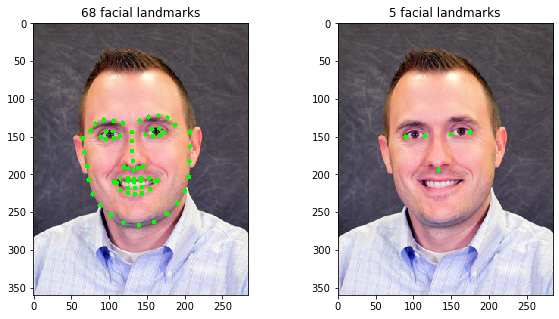

In [6]:
import cv2
import matplotlib.pyplot as plt
import face_recognition

# Load image:
img = cv2.imread("data/guy.png")

# Create imgs to show the results:
img68 = img.copy()
img5 = img.copy()

# BRG to RGB
rgb = img[:, :, ::-1]

# Detect 68 landmarks:
face_landmarks_list_68 = face_recognition.face_landmarks(rgb)

#print(face_landmarks_list_68)

# Draw all detected landmarks:
for face_landmarks in face_landmarks_list_68:
    for facial_feature in face_landmarks.keys():
        for p in face_landmarks[facial_feature]:
            cv2.circle(img68, p, 3, (0, 255, 0), -1)

# Detect 5 landmarks:
face_landmarks_list_5 = face_recognition.face_landmarks(rgb, None, "small")

#print(face_landmarks_list_5)

# Draw all detected landmarks:
for face_landmarks in face_landmarks_list_5:
    for facial_feature in face_landmarks.keys():
        for p in face_landmarks[facial_feature]:
            cv2.circle(img5, p, 3, (0, 255, 0), -1)

# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(10, 5))

# Plot the imgs:
imgRGB = img68[:,:,::-1]
plt.subplot(1,2,1)
plt.imshow(imgRGB)
plt.title("68 facial landmarks")

imgRGB = img5[:,:,::-1]
plt.subplot(1,2,2)
plt.imshow(imgRGB)
plt.title("5 facial landmarks")

# Show the Figure:
plt.show()
